In [66]:
#import library
library('ggplot2') # visualization
library('ggthemes') # visualization
library('scales') # visualization
library('grid') # visualisation
library('gridExtra') # visualisation
library('corrplot') # visualisation
library('ggfortify') # visualisation
install.packages('ggraph') # visualisation
library('igraph') # visualisation
library('dplyr') # data manipulation
library('readr') # data input
library('tibble') # data wrangling
library('tidyr') # data wrangling
library('stringr') # string manipulation
library('forcats') # factor manipulation
library('tidytext') # text mining
library('SnowballC') # text analysis
library('wordcloud') # test visualisation

also installing the dependencies ‘udunits2’, ‘tweenr’, ‘units’, ‘ggforce’, ‘ggrepel’

Warning message in install.packages("ggraph"):
“installation of package ‘udunits2’ had non-zero exit status”Warning message in install.packages("ggraph"):
“installation of package ‘tweenr’ had non-zero exit status”Warning message in install.packages("ggraph"):
“installation of package ‘ggrepel’ had non-zero exit status”Warning message in install.packages("ggraph"):
“installation of package ‘units’ had non-zero exit status”Warning message in install.packages("ggraph"):
“installation of package ‘ggforce’ had non-zero exit status”Warning message in install.packages("ggraph"):
“installation of package ‘ggraph’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error: package or namespace load failed for ‘igraph’


In [14]:
train <- read_csv('training_variants')
test <- read_csv('test_variants')

Parsed with column specification:
cols(
  ID = col_integer(),
  Gene = col_character(),
  Variation = col_character(),
  Class = col_integer()
)
Parsed with column specification:
cols(
  ID = col_integer(),
  Gene = col_character(),
  Variation = col_character()
)


In [15]:
#Read text file
train_txt_dump <- tibble(text = read_lines('training_text', skip = 1))
train_txt <- train_txt_dump %>%
  separate(text, into = c("ID", "txt"), sep = "\\|\\|")
train_txt <- train_txt %>%
  mutate(ID = as.integer(ID))

test_txt_dump <- tibble(text = read_lines('test_text', skip = 1))
test_txt <- test_txt_dump %>%
  separate(text, into = c("ID", "txt"), sep = "\\|\\|")
test_txt <- test_txt %>%
  mutate(ID = as.integer(ID))

In [16]:
head(train_txt)

ID,txt


In [17]:
train <- train %>%
    mutate(Gene = factor(Gene),
           Variation = factor(Variation),
            Class = factor(Class))

test <- test%>% 
    mutate( Gene = factor(Gene),
            variation = factor(Variation))
summary(train,maxsum = 9)

       ID            Gene                     Variation    Class  
 Min.   :   0   BRCA1  : 264   Truncating Mutations:  93   1:568  
 1st Qu.: 830   TP53   : 163   Deletion            :  74   2:452  
 Median :1660   EGFR   : 141   Amplification       :  71   3: 89  
 Mean   :1660   PTEN   : 126   Fusions             :  34   4:686  
 3rd Qu.:2490   BRCA2  : 125   Overexpression      :   6   5:242  
 Max.   :3320   KIT    :  99   G12V                :   4   6:275  
                BRAF   :  93   E17K                :   3   7:953  
                ALK    :  69   Q61H                :   3   8: 19  
                (Other):2241   (Other)             :3033   9: 37  

In [18]:
glimpse(train)

Observations: 3,321
Variables: 4
$ ID        <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
$ Gene      <fctr> FAM58A, CBL, CBL, CBL, CBL, CBL, CBL, CBL, CBL, CBL, CBL...
$ Variation <fctr> Truncating Mutations, W802*, Q249E, N454D, L399V, V391I,...
$ Class     <fctr> 1, 2, 2, 3, 4, 4, 5, 1, 4, 4, 4, 4, 4, 4, 5, 4, 1, 4, 5,...


In [19]:
nrow(train)

[1] 3321

In [20]:
nrow(test)

[1] 5668

In [21]:
sum(is.na(train))

[1] 0

In [22]:
sum(is.na(test))

[1] 0

In [23]:
train %>%
    group_by(Gene)%>%
    summarise(ct = n())%>%
    arrange(desc(ct))

Gene,ct
BRCA1,264
TP53,163
EGFR,141
PTEN,126
BRCA2,125
KIT,99
BRAF,93
ALK,69
ERBB2,69
PDGFRA,60


In [24]:
test %>%
    group_by(Gene)%>%
    summarise(ct =n())%>%
    arrange(desc(ct))
    

Gene,ct
F8,134
CFTR,57
F9,54
G6PD,46
GBA,39
AR,38
PAH,38
CASR,37
ARSA,30
BRCA1,29


In [25]:
train%>% 
    group_by(Variation)%>%
    summarise(ct=n())%>%
    arrange(desc(ct))

Variation,ct
Truncating Mutations,93
Deletion,74
Amplification,71
Fusions,34
Overexpression,6
G12V,4
E17K,3
Q61H,3
Q61L,3
Q61R,3


In [26]:
test %>%
    group_by(Variation)%>%
    summarise(ct=n())%>%
    arrange(desc(ct))

Variation,ct
Truncating Mutations,18
Deletion,14
Amplification,8
Fusions,3
G44D,2
A101V,1
A1020P,1
A1028V,1
A1035V,1
A1038V,1


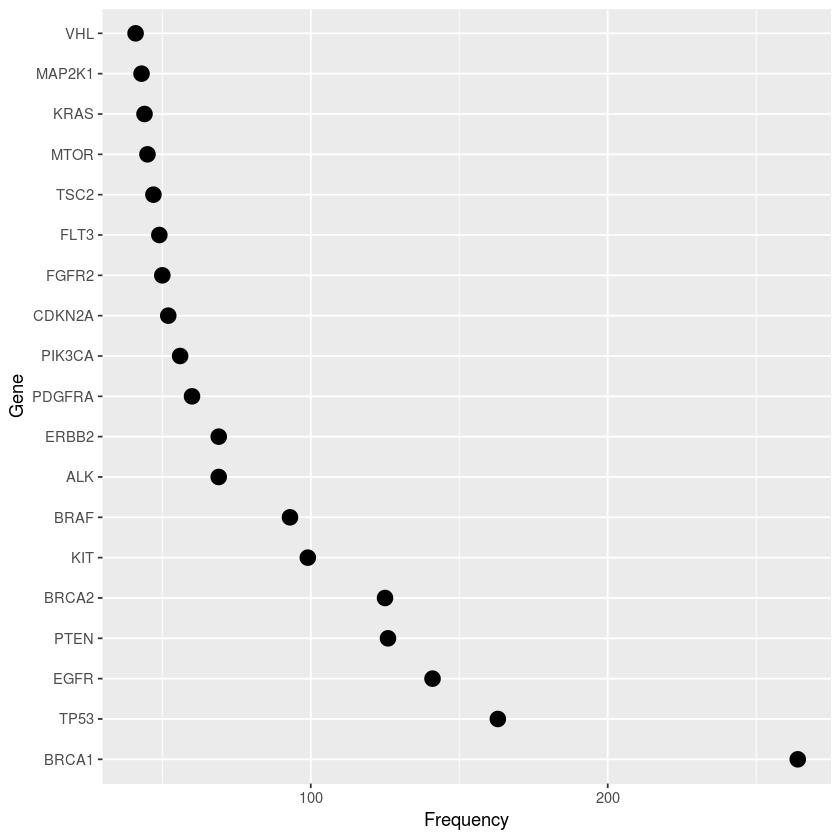

In [27]:
top_gene <- train%>%
    group_by(Gene)%>%
    summarise(ct=n())%>%
    filter(ct>40)
top_gene %>%
    ggplot(aes(reorder(Gene,-ct,FUN = min),ct))+
    geom_point(size=4)+
    labs(x='Gene',y='Frequency')+
    coord_flip()

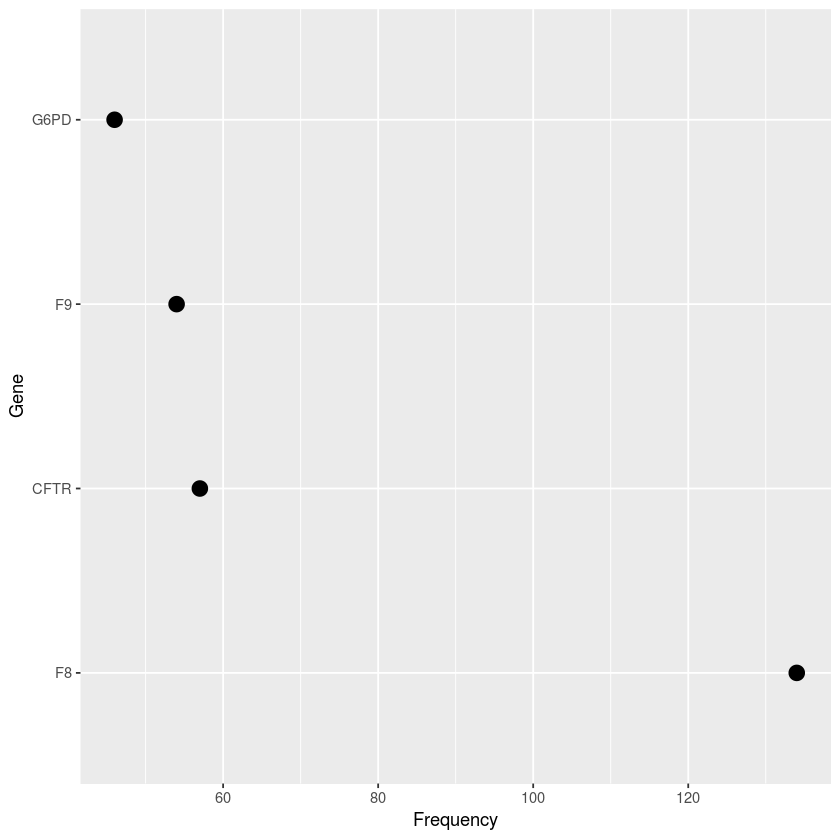

In [28]:
top_gene_test <- test %>%
    group_by(Gene)%>%
    summarise(ct=n())%>%
    filter(ct>40)
top_gene_test %>%
    ggplot(aes(reorder(Gene,-ct,FUN = min),ct))+
    geom_point(size=4)+
    labs(x='Gene',y='Frequency')+
    coord_flip()

Joining, by = c("Gene", "Variation", "set")
Warning message in full_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”Warning message in full_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining character vector and factor, coercing into character vector”Warning message in full_join_impl(x, y, by$x, by$y, suffix$x, suffix$y):
“joining factors with different levels, coercing to character vector”

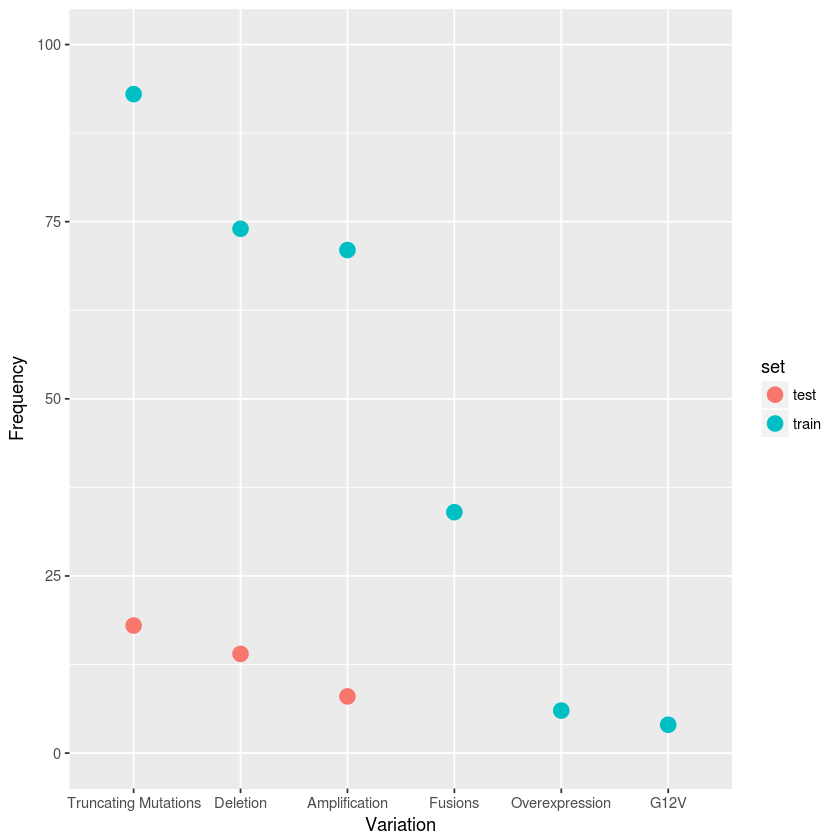

In [29]:
foo <- train %>% mutate(set = factor("train")) %>% select(-Class, -ID)
bar <- test %>% mutate(set = factor("test")) %>% select(-ID)

foo <- full_join(foo, bar)

foo %>%
  group_by(Variation, set) %>%
  summarise(ct = n()) %>%
  filter(ct > 3) %>%
  ggplot(aes(reorder(Variation, -ct, FUN = median), ct, colour = set)) +
  geom_point(size = 4) +
  coord_cartesian(ylim = c(0, 100)) +
  labs(x = "Variation", y = "Frequency")


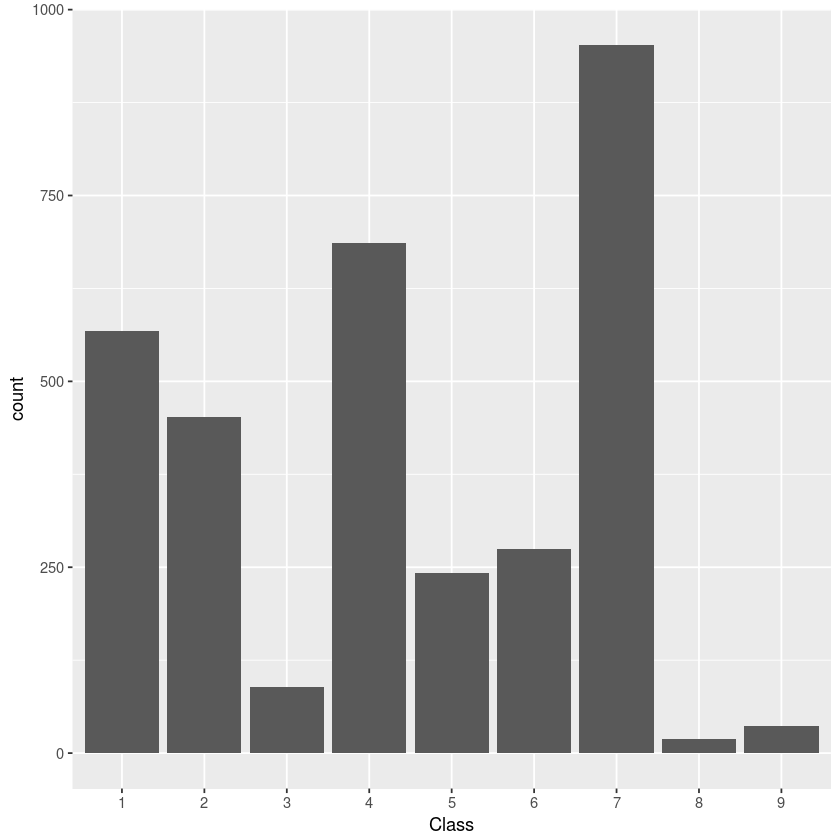

In [30]:
train%>%
    ggplot(aes(Class))+
    geom_bar()

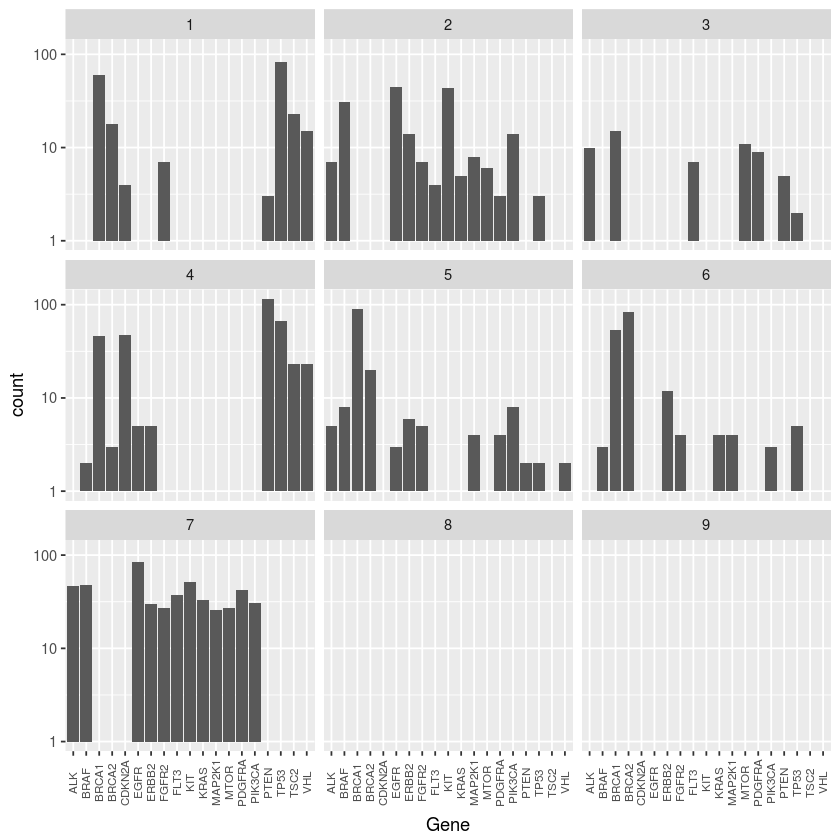

In [31]:
train %>%
  filter(Gene %in% str_c(top_gene$Gene)) %>%
  ggplot(aes(Gene)) +
  geom_bar() +
  scale_y_log10() +
  theme(axis.text.x  = element_text(angle=90, vjust=0.5, size=7)) +
  facet_wrap(~ Class)

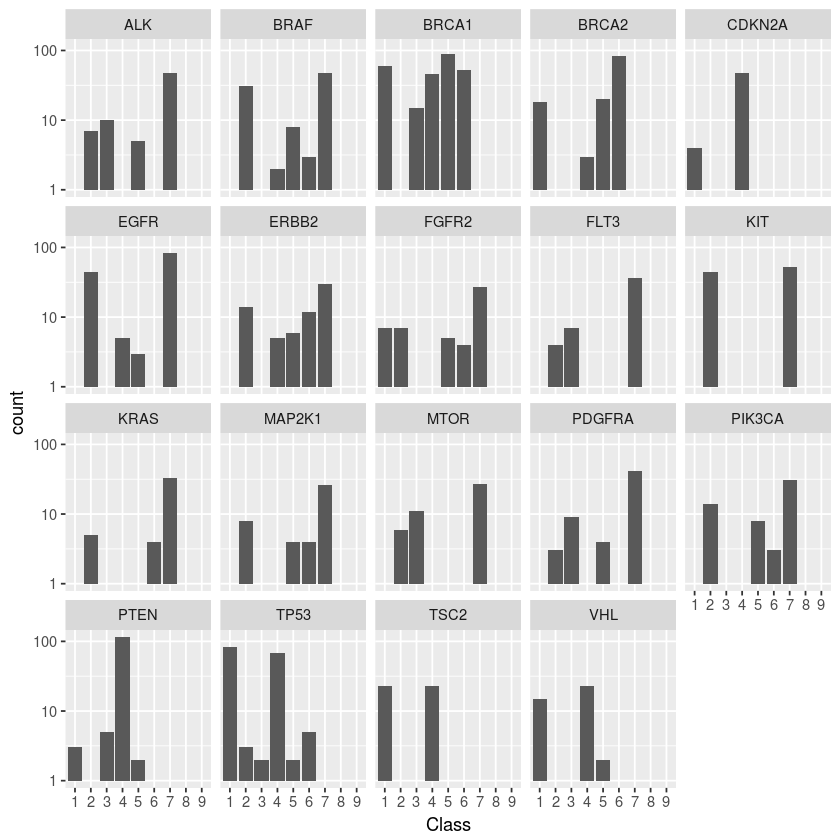

In [32]:
train %>%
    filter(Gene %in% str_c(top_gene$Gene))%>%
    ggplot(aes(Class))+
    geom_bar()+
    scale_y_log10()+
    facet_wrap(~Gene)


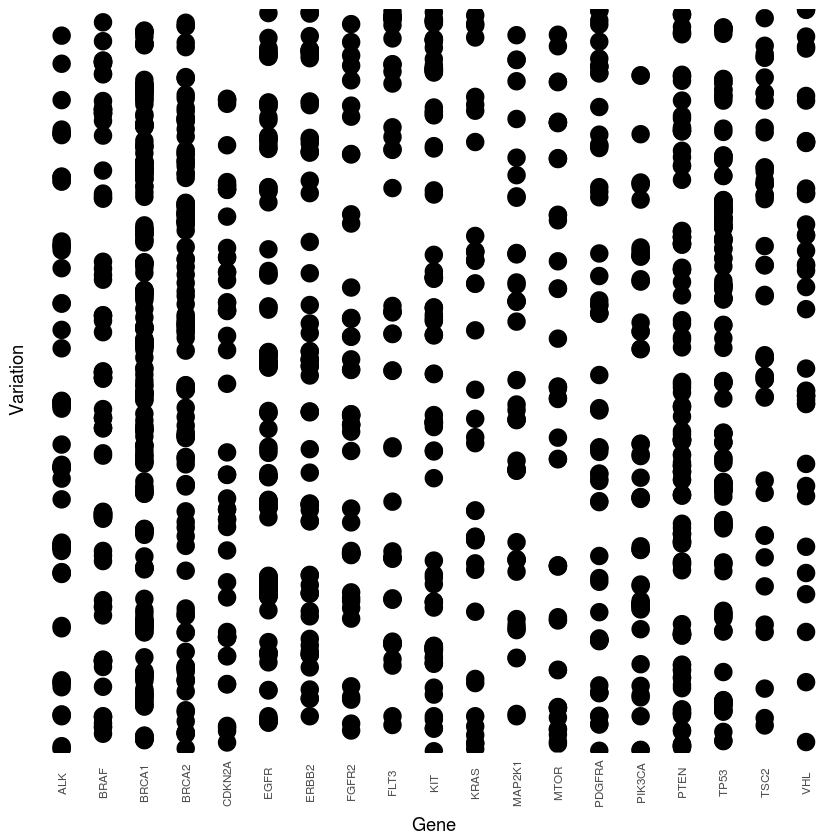

In [33]:
foo <- train%>%
    filter(Gene %in% str_c(top_gene$Gene))%>%
    group_by(Gene,Variation)%>%
    summarise(ct=n())
y_labels <-str_sub(foo$Variation, start = 1,end = 5)

foo %>%
    ggplot(aes(reorder(Gene,ct,FUN=median),reorder(Variation,ct,FUN=median)))+
    geom_count()+
    labs(x='Gene',y='Variation')+
    theme(axis.text.x = element_text(angle = 90,vjust = 0.5,size=7),axis.text.y = element_blank(),
         legend.position='none',axis.ticks=element_blank())

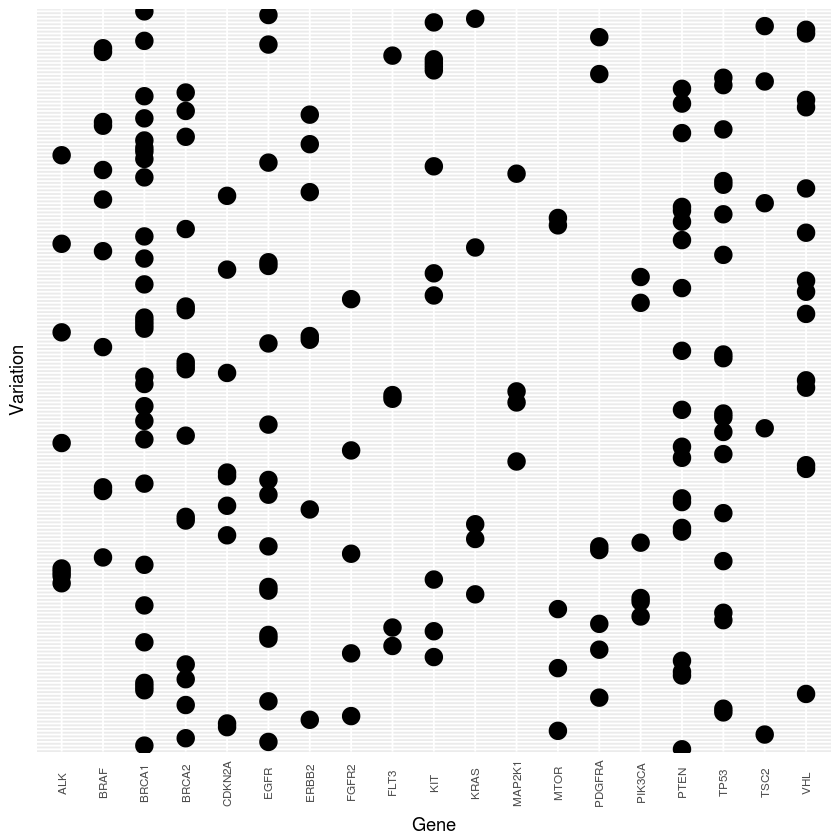

In [34]:
foo <- test%>%
    filter(Gene %in% str_c(top_gene$Gene))%>%
    group_by(Gene,Variation)%>%
    summarise(ct=n())
y_labels <- str_sub(foo$Variation, start=1,end=5)

foo%>% 
    ggplot(aes(reorder(Gene, ct, FUN=median),reorder(Variation, ct, FUN=median)))+
    geom_count()+
    labs(x='Gene',y='Variation')+
    theme(axis.text.x = element_text(angle=90,vjust = 0.5, size=7),axis.text.y=element_blank(),
         axis.ticks=element_blank(),legend.position='none')

In [35]:
train_txt <- train_txt %>%
  mutate(txt_len = str_length(txt),
         set = "train")

test_txt <- test_txt %>%
  mutate(txt_len = str_length(txt),
         set = "test")

combine_txt <- full_join(train_txt,test_txt)

Joining, by = c("ID", "txt", "txt_len", "set")


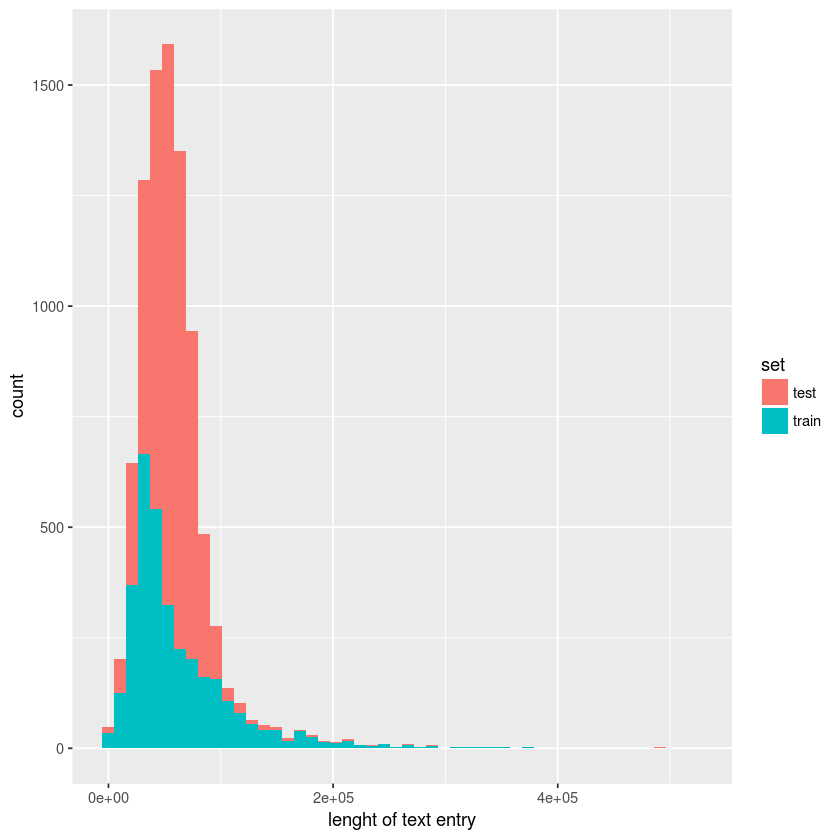

In [36]:
combine_txt %>%
    ggplot(aes(txt_len,fill=set))+
    geom_histogram(bins=50)+
    labs(x='lenght of text entry')

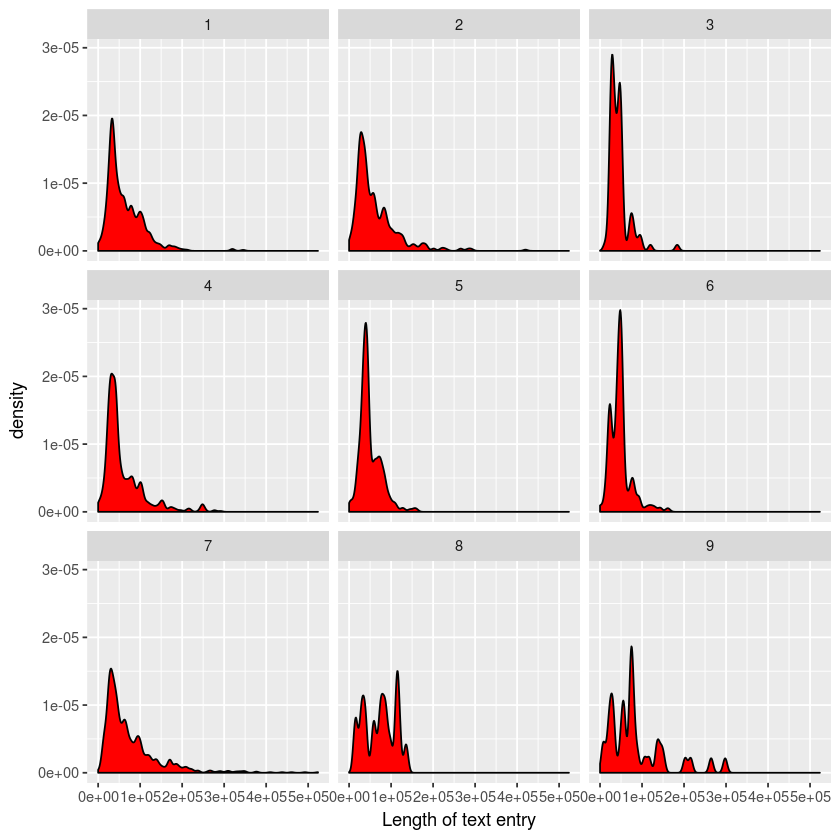

In [37]:
foo <-train_txt %>%
    select(ID,txt_len)
bar <- train %>%
    select(ID,Class)

full_join(foo,bar, by = 'ID')%>%
    ggplot(aes(txt_len))+
    geom_density(fill='red',bw=5e3)+
    labs(x='Length of text entry')+
    facet_wrap(~Class)

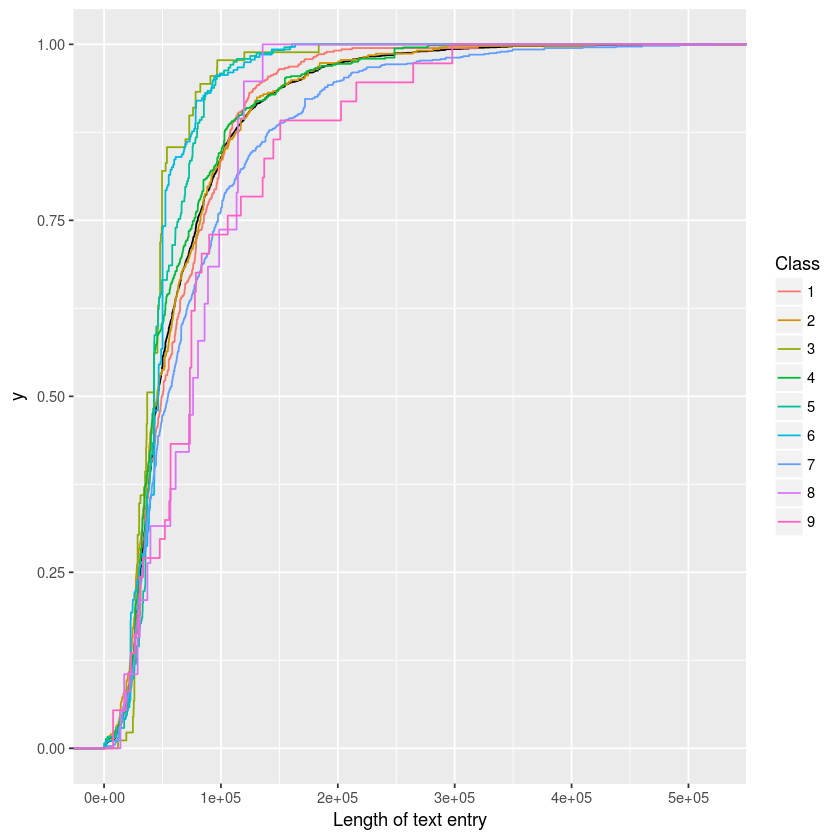

In [38]:
foo <- train_txt %>%
    select(ID,txt_len)
bar <- train %>%
    select(ID,Class)
full_join(foo,bar,by='ID')%>%
    ggplot(aes(txt_len))+
    stat_ecdf(geom= 'step')+
    stat_ecdf(aes(txt_len,color=Class),geom='step')+
    labs(x='Length of text entry')

In [39]:
foo <- train_txt %>%
    select(ID,txt_len)
bar <- train %>%
    select(ID,Class)

full_join(foo,bar,by='ID')%>%
    group_by(Class)%>%
    summarise(l_med=median(txt_len))

Class,l_med
1,49581.5
2,45434.0
3,36901.0
4,42790.0
5,42863.0
6,46289.0
7,54675.0
8,76146.0
9,73433.0


In [40]:
combine_txt %>%
    filter(txt_len<100)

ID,txt,txt_len,set
1109,null,5,train
1277,null,5,train
1407,null,5,train
1639,null,5,train
2755,null,5,train
1623,null,5,test


In [41]:
train_txt <- train_txt %>%
    mutate(f_pathogenic = str_count(txt,'pathogenic'),
          f_benign = str_count(txt,'benign'))

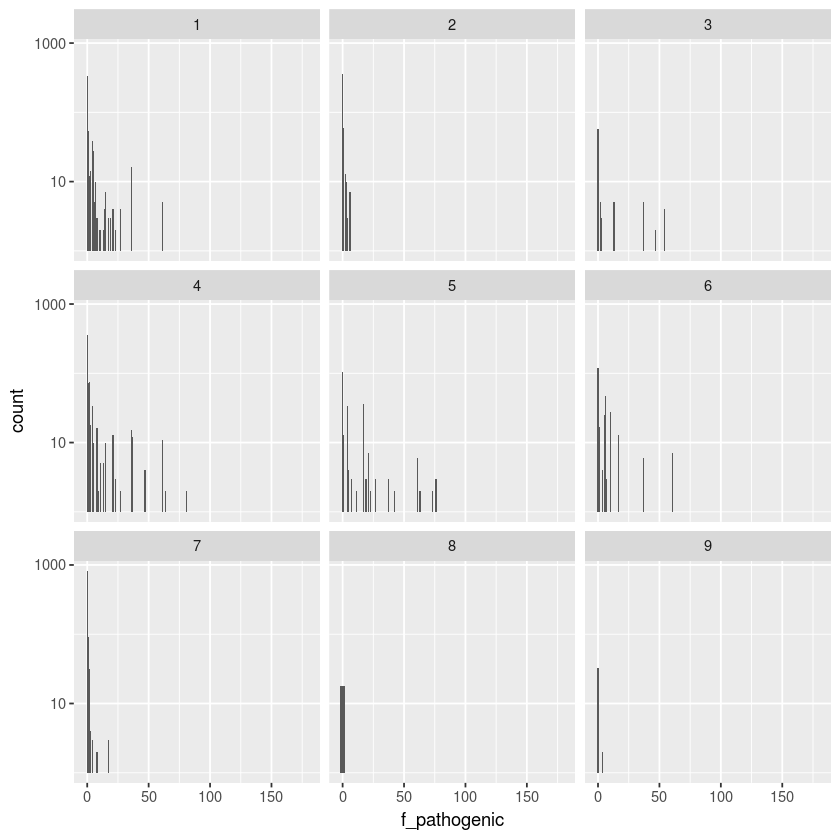

In [42]:
foo <- train_txt %>%
    select(ID,f_pathogenic,f_benign)
bar <- train %>%
    select(ID,Class)

full_join(foo,bar,by='ID')%>%
    ggplot(aes(f_pathogenic))+
    geom_bar()+
    scale_y_log10()+
    facet_wrap(~Class)

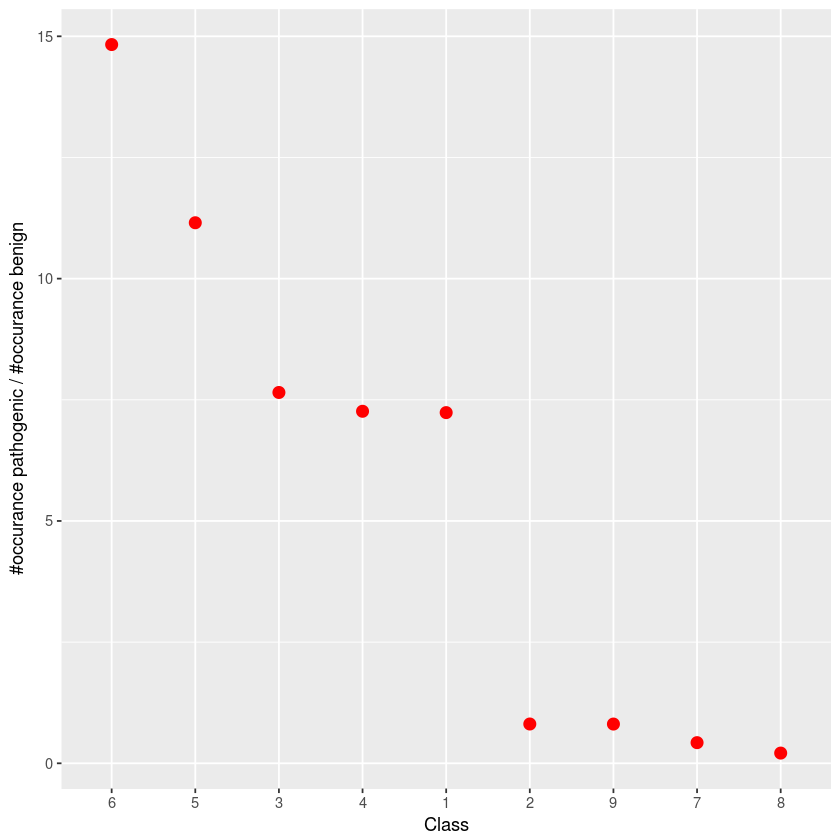

In [49]:
foo <- train_txt %>%
    select(ID, f_pathogenic,f_benign)
bar <- train%>%
    select(ID,Class)
full_join(foo,bar,by='ID')%>%
    group_by(Class)%>%
    summarise(mean_benign = mean(f_benign),
             mean_pathogenic = mean(f_pathogenic),
             path_ben = mean(f_pathogenic)/mean(f_benign)) %>%
    ggplot(aes(reorder(Class,-path_ben,FUN=max),path_ben))+
    geom_point(color='red',size=3)+
    labs(x='Class',y='#occurance pathogenic / #occurance benign')   

In [60]:
t1 <- train_txt %>% select(ID, txt) %>% unnest_tokens(word, txt)
head(t1)

ERROR: Error in loadNamespace(name): there is no package called ‘purrr’


In [63]:
data('stop_words')


In [64]:
t1

ERROR: Error in eval(expr, envir, enclos): object 't1' not found
